In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
csv_file = 'data/20240122/45d2cms3cm.csv'
df = pd.read_csv(csv_file)

# 将第一列设置为时间索引

print(df.columns)
# 绘制图表
plt.plot(df[' pitch'])
plt.plot(df[' roll'])
plt.plot(df[' yaw'])
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Attitude')
plt.show()

Index(['timeTick', ' stateX', ' stateY', ' stateZ', ' stateVX', ' stateVY',
       ' stateVZ', ' whisker1', ' whisker2', ' whisker3', ' motor1', ' motor2',
       ' motor3', ' motor4', ' otX', ' otY', ' otZ', ' yaw', ' laserFront'],
      dtype='object')


KeyError: ' pitch'

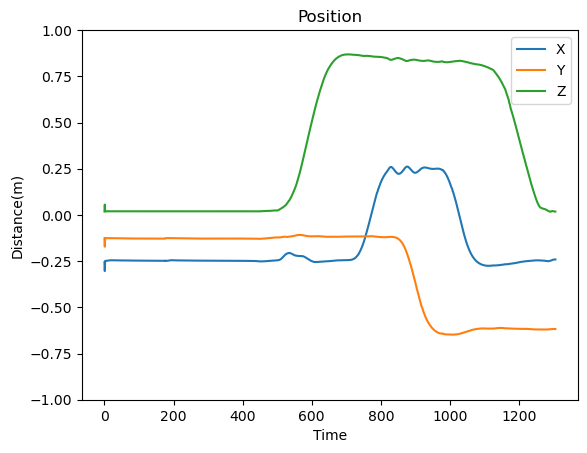

In [53]:
plt.plot(df[' stateX'],label='X')
plt.plot(df[' stateY'],label='Y')
plt.plot(df[' stateZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

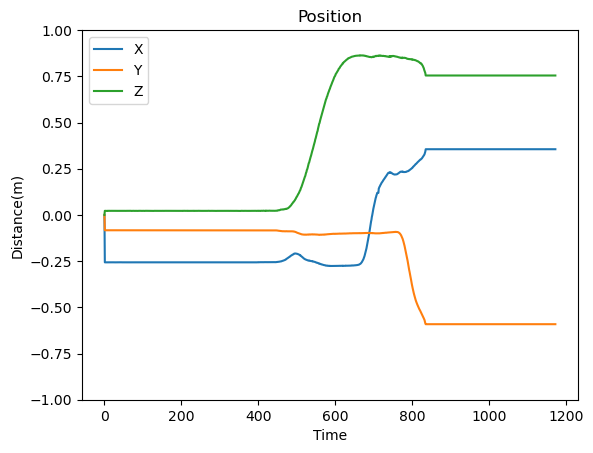

In [42]:
plt.plot(df[' otX'],label='X')
plt.plot(df[' otY'],label='Y')
plt.plot(df[' otZ'],label='Z')
plt.legend()
plt.ylim(-1,1)
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.title('Position')
plt.show()

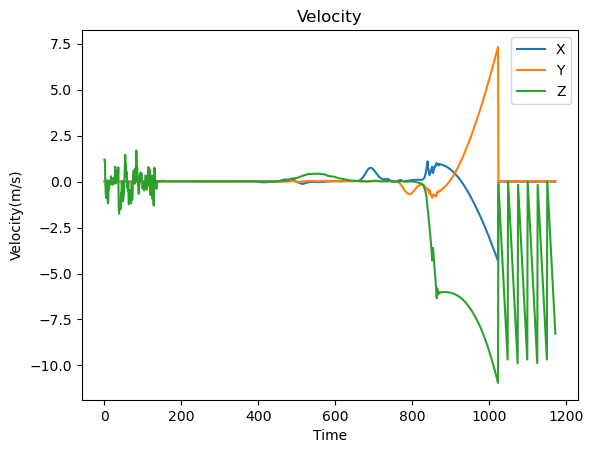

In [43]:
plt.plot(df[' stateVX'],label='X')
plt.plot(df[' stateVY'],label='Y')
plt.plot(df[' stateVZ'],label='Z')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Velocity')
plt.show()

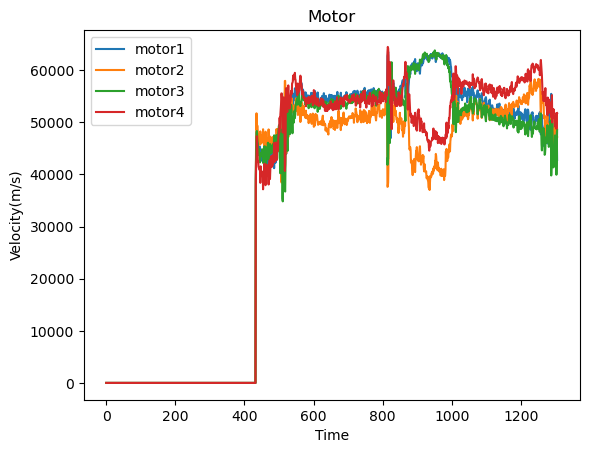

In [50]:
plt.plot(df[' motor1'],label='motor1')
plt.plot(df[' motor2'],label='motor2')
plt.plot(df[' motor3'],label='motor3')
plt.plot(df[' motor4'],label='motor4')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity(m/s)')
plt.title('Motor')
plt.show()

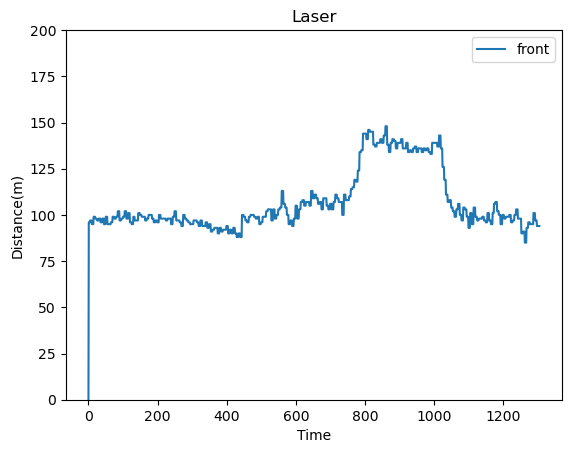

In [51]:

# 绘制图表
plt.plot(df[' laserFront'],label='front')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(m)')
plt.ylim(0, 200)
plt.title('Laser')
plt.show()

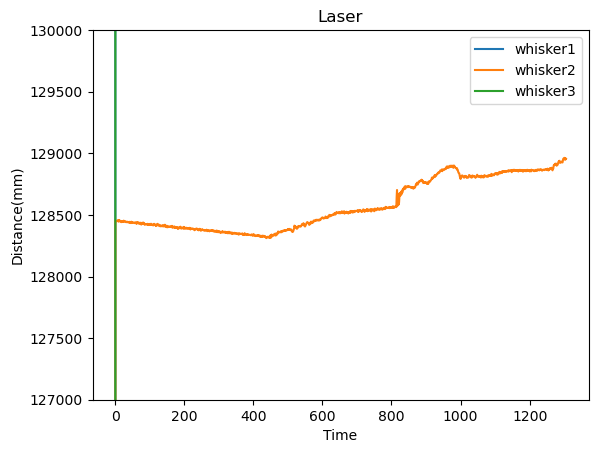

In [70]:

plt.plot(df[' whisker1'],label='whisker1')
plt.plot(df[' whisker2'],label='whisker2')
plt.plot(df[' whisker3'],label='whisker3')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Distance(mm)')
plt.ylim(127000, 130000)
plt.title('Laser')
plt.show()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def apply_lowpass_filter(data, high_freq):
    filtered_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        b, a = signal.butter(1, high_freq, 'lowpass')
        filtered_data[:, i] = signal.filtfilt(b, a, data[:, i])
    return filtered_data

def apply_bandpass_filter(number,data,low_freq,high_freq):
    filtered_data = np.zeros_like(data)
    if len(data.shape) != 2:
        b, a = signal.butter(number, [low_freq,high_freq], 'bandpass')
        filtered_data = signal.filtfilt(b, a, data)
    else:

        for i in range(data.shape[1]):
            b, a = signal.butter(1, [low_freq,high_freq], 'bandpass')
            filtered_data[:, i] = signal.filtfilt(b, a, data[:, i])
    return filtered_data

def rescale_array(array1,array2):
    scaled_array=np.zeros_like(array1)
    for i in range(array1.shape[1]):
        new_min=np.min(array1[:,i])
        new_max=np.max(array1[:,i])
        min_val = np.min(array2[:,i])
        max_val = np.max(array2[:,i])
        scaled_array[:,i] = (array2[:,i] - min_val) * (new_max - new_min) / (max_val - min_val) + new_min
    return scaled_array

[[157974.984375  128532.5       158089.4375   ]
 [157976.921875  128531.8359375 158091.375    ]
 [157976.921875  128539.3125    158087.5      ]
 ...
 [157932.375     128852.9765625 158037.03125  ]
 [157934.3125    128846.8359375 158040.90625  ]
 [157932.375     128865.2734375 158038.96875  ]]
[[ 0.58280926 -2.48866287  2.16036445]
 [ 1.142494   -2.79636802  2.2541331 ]
 [ 1.62108063 -3.23959112  2.30395175]
 ...
 [-0.26840264 -4.81719868  0.1740478 ]
 [-0.16380128 -3.92545035  0.17488886]
 [-0.13130563 -2.18246004  0.14145001]]


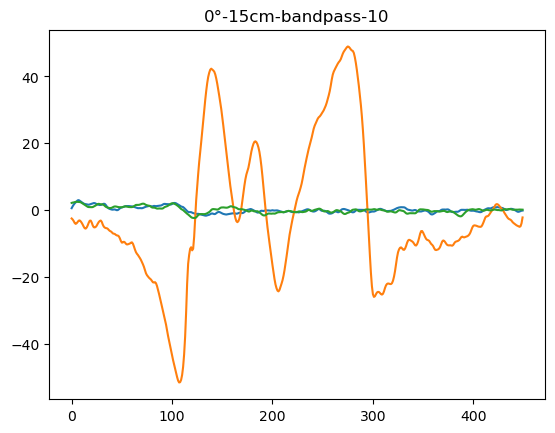

In [81]:
data = pd.read_csv('data/20240122/45d2cms3cm.csv')
pressure=data.iloc[700:1150,7:10].values
# y_placement=data.iloc[:,4].values
# force=data.iloc[:,5].values
# x_placement=data.iloc[:,6].values
# orientation=data.iloc[:,7].values

filtedData=apply_bandpass_filter(5,pressure, 0.01,0.1)
print(pressure)
print(filtedData)
plt.plot(filtedData)
# plt.plot(y_placement)
# plt.plot(force)
plt.title("0°-15cm-bandpass-10")
# plt.savefig('merged/filter/0°-15cm-bandpass-10.png')
plt.show()

Camera
Optitrack raw or kalman output
Laser range
Wall